In [1]:
from bauer.models import MagnitudeComparisonModel
from bauer.utils.data import load_garcia2022

In [2]:
df = load_garcia2022()

In [3]:
model1 = MagnitudeComparisonModel(df, fit_seperate_evidence_sd=False)
model1.build_estimation_model()
idata1 = model1.sample()

{'n1_prior_mu': mean, 'n1_prior_std': std, 'n2_prior_std': std, 'threshold': 0.0, 'n2_prior_mu': AdvancedSubtensor.0, 'n1_evidence_sd': Elemwise{softplus,no_inplace}.0, 'n2_evidence_sd': Elemwise{softplus,no_inplace}.0}


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [evidence_sd_mu_untransformed, evidence_sd_sd, evidence_sd_offset, n2_prior_mu_mu, n2_prior_mu_sd, n2_prior_mu_offset]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 76 seconds.


In [4]:
model2 = MagnitudeComparisonModel(df, fit_seperate_evidence_sd=True)
model2.build_estimation_model()
idata2 = model2.sample()

{'n1_prior_mu': mean, 'n1_prior_std': std, 'n2_prior_std': std, 'threshold': 0.0, 'n2_prior_mu': AdvancedSubtensor.0, 'n1_evidence_sd': Elemwise{softplus,no_inplace}.0, 'n2_evidence_sd': Elemwise{softplus,no_inplace}.0}


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n1_evidence_sd_mu_untransformed, n1_evidence_sd_sd, n1_evidence_sd_offset, n2_evidence_sd_mu_untransformed, n2_evidence_sd_sd, n2_evidence_sd_offset, n2_prior_mu_mu, n2_prior_mu_sd, n2_prior_mu_offset]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 99 seconds.


In [5]:
import arviz as az

In [6]:
comparison = az.compare({'Same evidence option 1 and 2':idata1, 'Different evidence for option 1 and 2':idata2})

/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<AxesSubplot: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

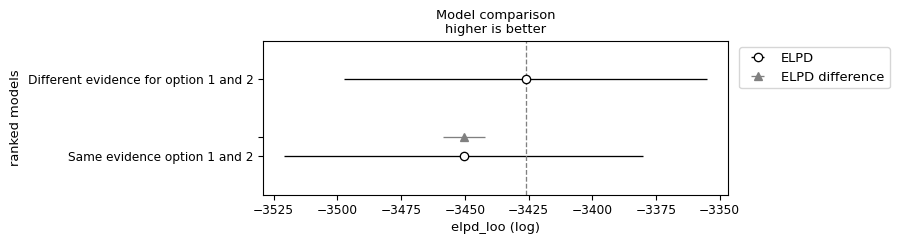

In [7]:
az.plot_compare(comparison)

In [8]:
evidence_sd = idata1['posterior']['evidence_sd'].to_dataframe().groupby(['subject']).mean()
evidence_sd1 = idata2['posterior']['n1_evidence_sd'].to_dataframe().groupby(['subject']).mean()
evidence_sd2 = idata2['posterior']['n2_evidence_sd'].to_dataframe().groupby(['subject']).mean()

pars = evidence_sd.join(evidence_sd1).join(evidence_sd2)

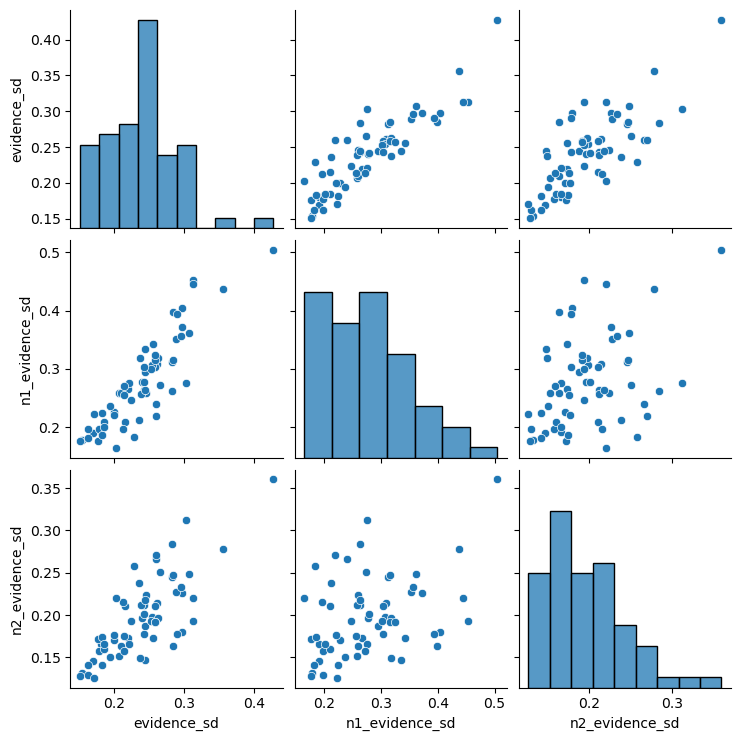

In [9]:
import seaborn as sns

sns.pairplot(pars)